In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("lab12-cs104.ipynb")

# Great British Bake Off (A/B Test)

Welcome. This week's lab will focus on A/B Testing using data from the popular British television show, [*The Great British Bakeoff*](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off).

Our lecture on A/B testing and its notebook may be useful in today's lab.

Before you get started, please set up the notebook by running the cell below.

In [5]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', (FutureWarning, np.VisibleDeprecationWarning))

## Lab Check-off

When does an A/B test show that the treatment causes a change in outcome?

An A/B test shows that the treatment causes a change in outcome when there is a statistically significant difference between the control group (A) and the treatment group (B). This means the observed difference in outcomes between the groups is unlikely to be due to chance. Typically, a p-value (probability value) less than a predefined threshold (commonly 0.05) indicates statistical significance, suggesting that the treatment has a genuine impact on the outcome.

## 1. A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions. We may also refer to an A/B test as a permutation test.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step. Oftentimes, we use an A/B test to determine whether or not two samples came from the same underlying distribution.

**Question 1.1.** The following statements are the steps of an A/B hypothesis test presented in a *random order*:

1. Choose a test statistic (typically the difference in means between two categories)

2. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times

3. Find the value of the observed test statistic

4. Calculate the p-value based off your observed and simulated test statistics

5. Define a null and alternate model

6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Assign `ab_test_order` to an array of integers that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test.

<!--
BEGIN QUESTION
name: q1_1
-->

In [6]:
ab_test_order = [5, 1, 3, 2, 4, 6]

In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** If the null hypothesis of an A/B test is correct, should the order of labels affect the differences in means between each group? Why do we shuffle labels in an A/B test? Confirm your answer with a neighbor or staff member before moving on. 

<!--
BEGIN QUESTION
name: q1_2
-->

If the null hypothesis is true, the order of labels shouldn't affect the difference in means because it assumes no real difference between groups. We shuffle labels to simulate this randomness, creating a distribution of the test statistic under the null hypothesis to see if the observed difference is due to chance.

## 2. The Great British Bake Off

>"The Great British Bake Off (often abbreviated to Bake Off or GBBO) is a British television baking competition, produced by Love Productions, in which a group of amateur bakers compete against each other in a series of rounds, attempting to impress a group of judges with their baking skills" [Wikipedia](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off)

For every week of the competition, the judges assign one contestant the title "Star Baker". Ultimately, one winner is crowned every season. Using this information, we would like to investigate how winning Star Baker awards affects the odds of winning a season of the show.

**Question 2.1.** We want to know whether winning more Star Baker awards *causes* a change in likelihood of winning the season.  Why is it not sufficient to compare star baker rates for winners and losers?

<!--
BEGIN QUESTION
name: q2_1
-->

Comparing Star Baker rates for winners and losers isn't sufficient to establish causation because it doesn't account for other variables that might influence both outcomes. Correlation doesn't imply causation; we need to control for confounding factors and ensure that the observed relationship is not due to other underlying factors. An A/B test or randomized experiment would be more appropriate to determine if winning more Star Baker awards actually causes an increase in the likelihood of winning the season.

### Running an Experiment

We are going to run the following hypothesis test to determine the association between winning and number of Star Baker awards. The population we are examining is every contestant from seasons 2 through 11 of GBBO. We are going to use the following null and alternative hypotheses:

**Null hypothesis:** The distribution of Star Baker awards between contestants who won their season and contestants who did not win their season is the same.

**Alternative hypothesis:** Contestants who win their season of the show will win more Star Baker awards on average.

Our alternative hypothesis is related to our suspicion that contestants who win more Star Baker awards are more skilled, so they are more likely to win the season.

**Question 2.2.** Should we use an A/B test to test these hypotheses? If yes, what is our "A" group and what is our "B" group?

<!--
BEGIN QUESTION
name: q2_2
-->

Yes, an A/B test is appropriate to test these hypotheses.

"A" group: Contestants who did not win their season.

"B" group: Contestants who won their season.

This test will allow us to compare the number of Star Baker awards between winners and non-winners to determine if there is a significant difference in their distributions

Check your answers with your neighbours or a staff member before you move on to the next section.

The `bakers` table below describes the number of star baker awards each contest won and whether or not they won their season (`1` if they won, `0` if they did not win). The data was manually aggregated from Wikipedia for seasons 2-11 of the show. We randomized the order of rows as to not spoil the outcome of the show.

In [8]:
bakers = Table.read_table("star_bakers.csv")
bakers.show(3)

star baker awards,won
3,1
0,0
1,0


**Question 2.3.** Create a new table called `means` that contains the mean number of star baker awards for bakers who did not win (`won==0`) and bakers that did win (`won==1`). The table should have the column names `won` and `star baker awards mean`.
<!--
BEGIN QUESTION
name: q2_3
-->

In [9]:
means = bakers.group('won', np.mean).select('won', 'star baker awards mean')
means

won,star baker awards mean
0,0.651786
1,1.5


In [10]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Visualize the distribution of Star Baker awards for winners and non-winners. You should use the bins we provided.

Hint: You will want to use the group argument of `tbl.hist`. In order to produce several overlayed histograms based on unique values in a given column, we can do something like `tbl.hist(..., group=<col_name>, bins=...)`!

<!--
BEGIN QUESTION
name: q2_4
-->

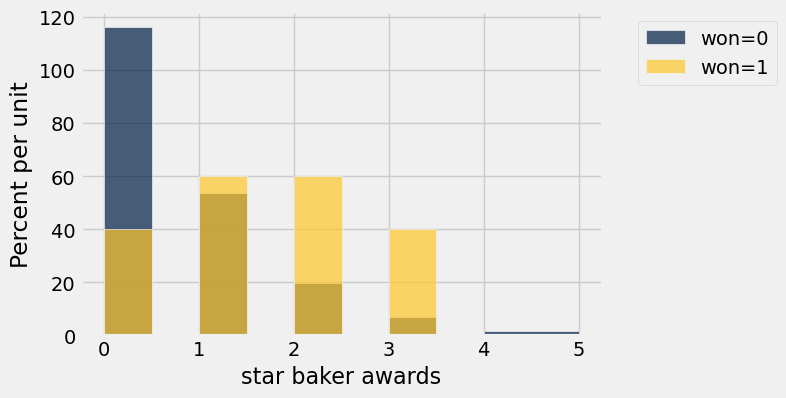

In [11]:
useful_bins = np.arange(0, 7)
bakers.hist('star baker awards', group='won',)

**Question 2.5.** We want to figure out if there is a difference between the distribution of Star Baker awards between winners and non winners. 

What should the test statistic be? Which values of this test statistic support the null, and which values support the alternative?

If you are in lab, confirm your answer with a neighbour or TA before moving on.

Hint: You should think about what measures we use to describe a distribution. 

<!--
BEGIN QUESTION
name: q2_5
-->

Test Statistic:
The test statistic should be the difference in the mean number of Star Baker awards between winners and non-winners.

Supporting Values:
Null Hypothesis: Values of the test statistic close to zero support the null hypothesis, which assumes that the distributions of Star Baker awards for winners and non-winners are the same (i.e., there's no significant difference between them).

Alternative Hypothesis: Values of the test statistic that are significantly different from zero (especially higher values) support the alternative hypothesis, suggesting that winners of the season win more Star Baker awards on average than non-winners.

In essence, if the difference in means is substantial, it indicates that winning more Star Baker awards is associated with winning the season, supporting the alternative hypothesis

**Question 2.6.** Set `observed_difference` to the observed test statistic using the `means` table. 

<!--
BEGIN QUESTION
name: q2_6
-->

In [12]:
observed_difference = means.column('star baker awards mean').item(1) - means.column('star baker awards mean').item(0)
observed_difference

0.8482142857142857

In [13]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Given a table like `bakers`, a label column `label_col`, and a values column `val_col`, write a function that calculates the appropriate test statistic.

*Hint:* Make sure that you are taking the directionality of our alternative hypothesis into account.

<!--
BEGIN QUESTION
name: q2_7
-->

In [14]:
def find_test_stat(tbl, label_col, val_col):
    # Calculate the means of the value column for each group in the label column
    means = tbl.group(label_col, np.mean).select(label_col, val_col + ' mean')
    
    # Calculate the difference in means (won = 1 - won = 0)
    observed_difference = means.column(val_col + ' mean').item(1) - means.column(val_col + ' mean').item(0)
    
    return observed_difference

# Example usage
find_test_stat(bakers, "won", "star baker awards")


0.8482142857142857

In [15]:
grader.check("q2_7")

q2_7 results: All test cases passed!

When we run a simulation for A/B testing, we resample by **shuffling the labels** of the original sample. If the null hypothesis is true and the star baker award distributions are the same, we expect that the difference in mean star baker awards will be not change when `"won"` labels are changed.

**Question 2.8.** Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.

<!--
BEGIN QUESTION
name: q2_8
-->

In [16]:
def simulate_and_test_statistic(tbl, labels_col, values_col):
    # Shuffle the labels
    shuffled_labels = tbl.sample(with_replacement=False).column(labels_col)
    
    # Create a new table with the shuffled labels
    shuffled_tbl = tbl.with_column(labels_col, shuffled_labels)
    
    # Calculate the test statistic for the shuffled data
    test_statistic = find_test_stat(shuffled_tbl, labels_col, values_col)
    
    return test_statistic

# Example usage
simulate_and_test_statistic(bakers, "won", "star baker awards")


-0.13214285714285712

In [17]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 2.9.** Simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`.

<!--
BEGIN QUESTION
name: q2_9
-->

In [18]:
# Assuming the necessary libraries are already imported and the bakers table is loaded
differences = make_array()

# Simulate 5000 trials
num_trials = 5000

for _ in range(num_trials):
    trial_statistic = simulate_and_test_statistic(bakers, "won", "star baker awards")
    differences = np.append(differences, trial_statistic)

differences


array([ 0.08571429, -0.24107143,  0.19464286, ..., -0.45892857,
        0.08571429, -0.24107143])

In [19]:
grader.check("q2_9")

q2_9 results: All test cases passed!

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic.

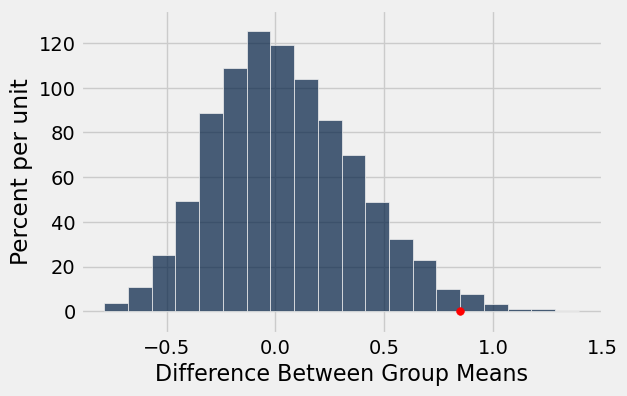

In [20]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=2)
plots.ylim(-0.1, 1.35);

**Question 2.10.** Find the p-value for your test and assign it to `empirical_p`.

<!--
BEGIN QUESTION
name: q2_10
-->

In [21]:
empirical_p = np.count_nonzero(differences >= observed_difference) / len(differences)
empirical_p

0.0144

In [22]:
grader.check("q2_10")

q2_10 results: All test cases passed!

**Question 2.11.** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about the association between star baker awards and winning? What can you claim about causation from your statistical analysis? If you are in lab, call a TA over and confirm your answer.

<!--
BEGIN QUESTION
name: q2_10
-->

If the P-value is less than 0.05, we reject the null hypothesis. This means that there is significant evidence to support the alternative hypothesis, suggesting that contestants who win the season tend to win more Star Baker awards on average.

Findings:
Association: Our analysis indicates a strong association between winning more Star Baker awards and winning the season. Contestants who frequently win Star Baker are more likely to win the entire season.

Causation: While we can say that there's a significant relationship between winning Star Baker awards and winning the season, we cannot definitively claim causation. There might be other factors at play that influence both outcomes, so it's important to acknowledge that correlation does not imply causation.

In simple terms, winning Star Baker awards seems to go hand-in-hand with winning the season, but we can't say for sure that winning these awards causes contestants to win the whole season.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [23]:
grader.check_all()

q1_1 results: All test cases passed!

q2_10 results: All test cases passed!

q2_3 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q2_8 results: All test cases passed!

q2_9 results: All test cases passed!

## Submission

**Important submission information:** 

- Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. 
- Be sure to run the tests and verify that they all pass.
- Then choose **Save** from the **File** menu to save your file.
- Then, go to Canvas and submit the file as your solution. (Only the prescribed team member needs to submit.)

Monkey wanted to say congrats on finishing.  Time to play.

<img src="monkey_playing_scaled_0.15.jpg" alt="relaxing" width="300"/>